In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df['customerID'].value_counts().sum()

7043

In [6]:
#Since Customer ID has all unique values, it is not important.
df.drop('customerID', axis=1, inplace=True)


In [7]:
df.shape

(7043, 20)

In [8]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Surprisingly, TotalCharges column is object data type. I converted it to the float type below.

In [10]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [11]:
df['TotalCharges'].nunique()

6531

In [12]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

non_numeric_rows = df['TotalCharges'].isna()


print(df['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64


In [13]:
df['TotalCharges'].nunique()

6530

In [14]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There were 11 null values in the TotalCharges column. I filled with the average value.

In [16]:
average_A = df['TotalCharges'].mean()
df['TotalCharges'].fillna(average_A, inplace=True)
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Contract Type Duration: Calculate the duration (in months) of the contract based on the tenure and contract type (e.g., month-to-month, one year, two years).

In [17]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [18]:
def calculate_contract_duration(row):
    if row['Contract'] == 'Month-to-month':
        return row['tenure']  # For month-to-month, tenure in months is the duration
    elif row['Contract'] == 'One year':
        return 12  
    elif row['Contract'] == 'Two year':
        return 24  
    else:
        return None

df['Contract'] = df.apply(calculate_contract_duration, axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [21]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<AxesSubplot:title={'center':'Count of different gender'}>

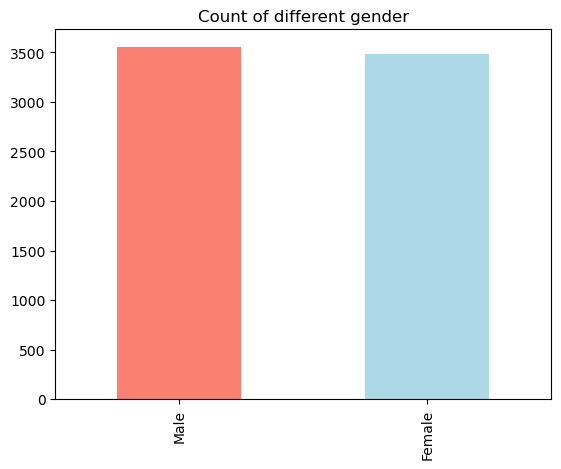

In [22]:
df['gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

In [23]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:title={'center':'Ratio of Churn'}>

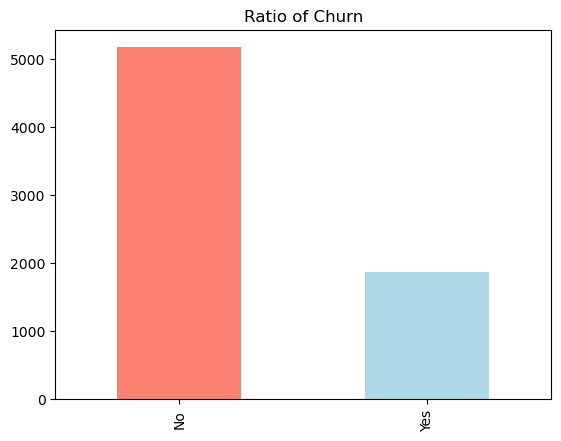

In [24]:
df['Churn'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Ratio of Churn")

In [25]:
df['tenure'].nunique()

73

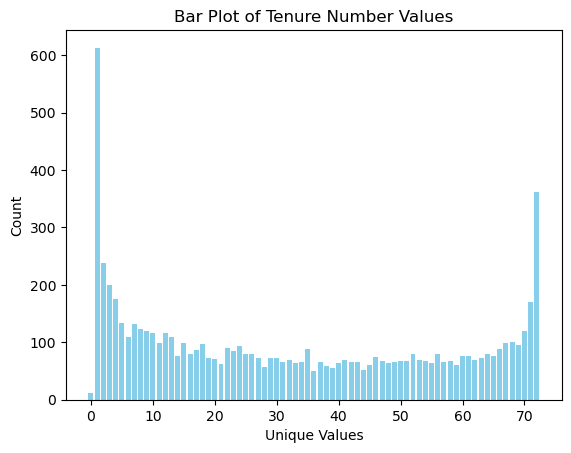

In [26]:
unique_values, value_counts = np.unique(df['tenure'], return_counts=True)

plt.bar(unique_values, value_counts, color='skyblue')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.title('Bar Plot of Tenure Number Values')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, 

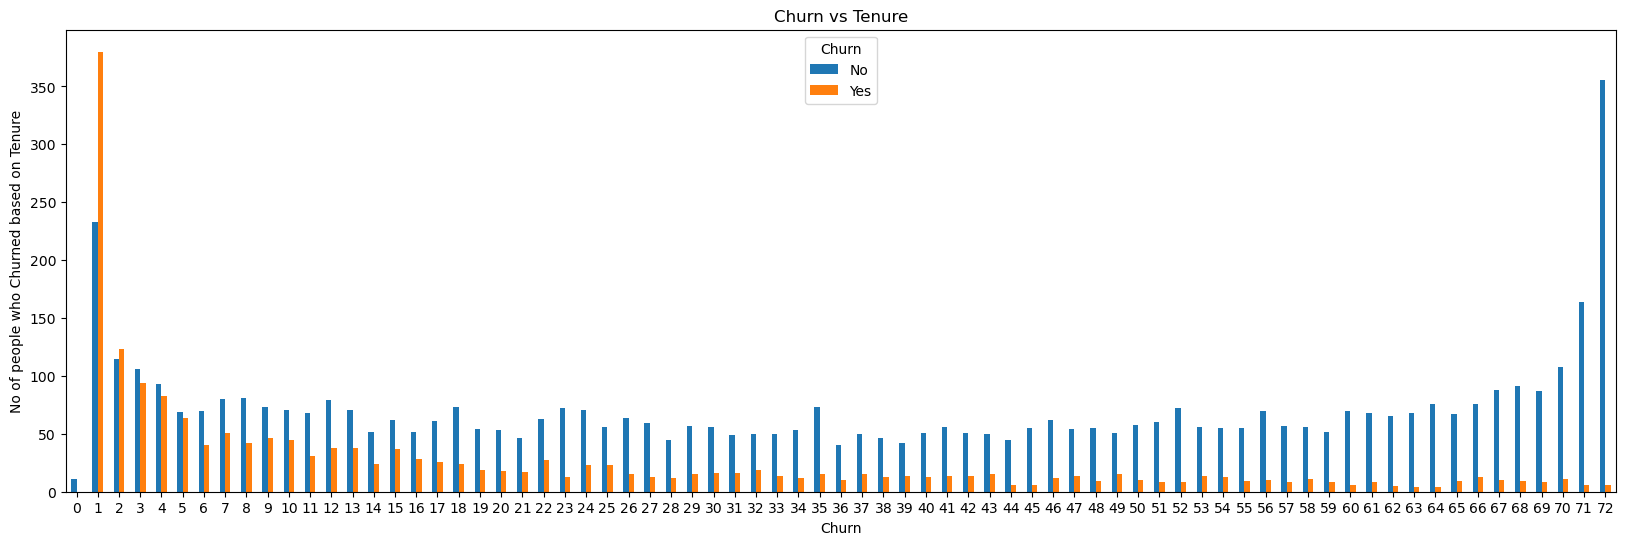

In [27]:
pd.crosstab(df['tenure'],df['Churn']).plot(kind="bar",figsize=(20,6))
plt.title("Churn vs Tenure")
plt.xlabel("Churn")
plt.ylabel("No of people who Churned based on Tenure")
#plt.legend(["Not Churned","Churned"])
plt.xticks(rotation=0)

Tenure in Years: Convert the 'tenure' column (how long they've been a customer) from months to years. This can make the data more intuitive and easier to interpret.

In [28]:
df['tenure_years'] = df['tenure'] / 12.0 
df.drop('tenure', axis=1, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   int64  
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


Monthly Charges to Total Charges Ratio: Calculate a new column by dividing 'monthly charges' by 'total charges'. This can indicate whether the customer tends to have stable or fluctuating charges over time.

In [30]:
df['charge_ratio'] = df['MonthlyCharges'] / df['TotalCharges']

In [31]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')


In [32]:
categorical_cols1= ['gender', 'Partner', 'Dependents', 'PhoneService'] 

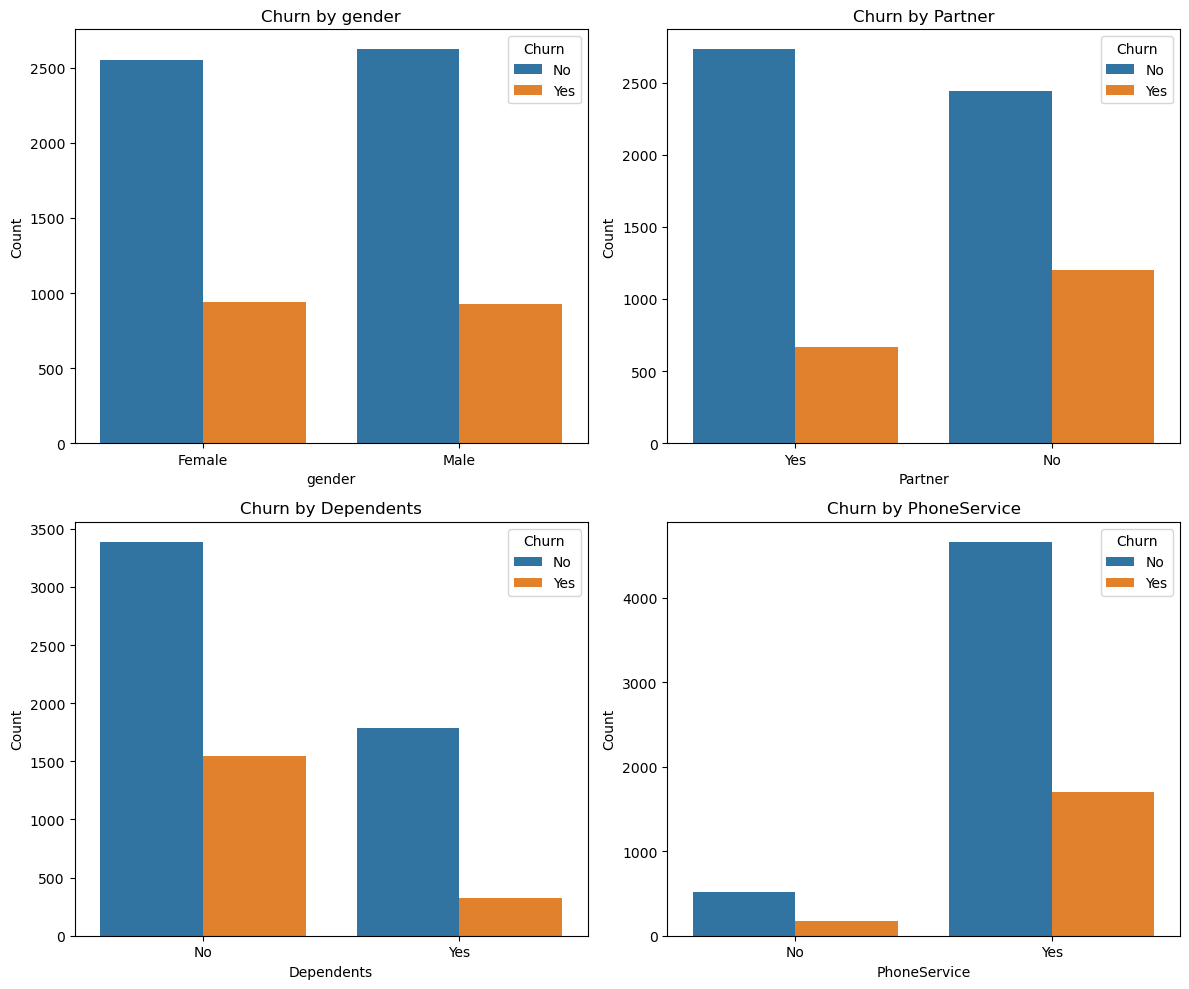

In [33]:
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_cols1, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'Churn by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [34]:
df['gender']=df.gender.map(lambda a: 0 if a == 'Female' else 1)
df['Partner']=df.Partner.map(lambda a: 0 if a == 'No' else 1)
df['Dependents']=df.Dependents.map(lambda a: 0 if a == 'No' else 1)
df['PhoneService']=df.PhoneService.map(lambda a: 0 if a == 'No' else 1)

In [35]:
print("Gender")
print(df['gender'].value_counts())
print("\nPartner")
print(df['Partner'].value_counts())
print("\nDependents")
print(df['Dependents'].value_counts())
print("\nPhoneService")
print(df['PhoneService'].value_counts())

Gender
1    3555
0    3488
Name: gender, dtype: int64

Partner
0    3641
1    3402
Name: Partner, dtype: int64

Dependents
0    4933
1    2110
Name: Dependents, dtype: int64

PhoneService
1    6361
0     682
Name: PhoneService, dtype: int64


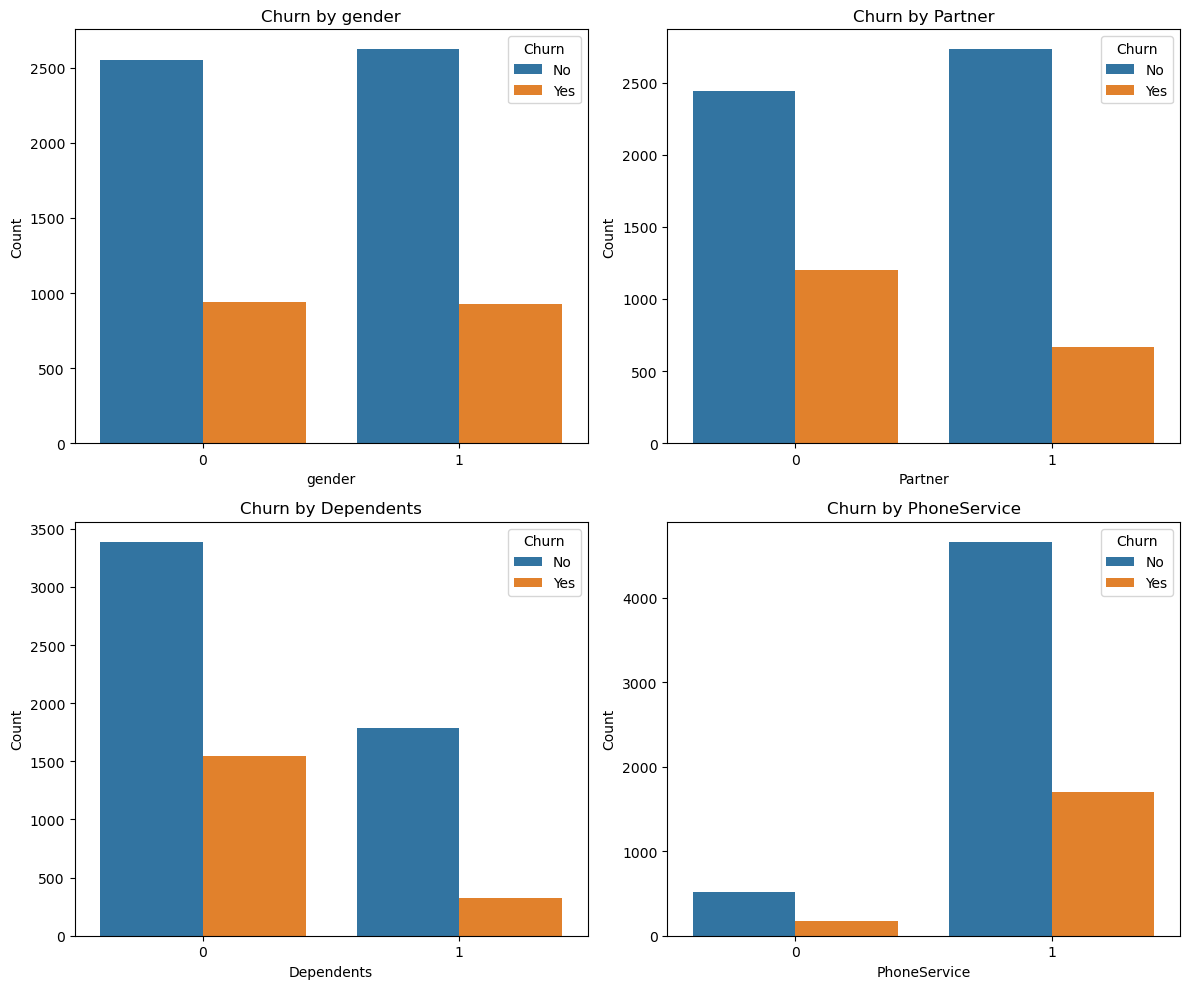

In [36]:
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_cols1, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'Churn by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

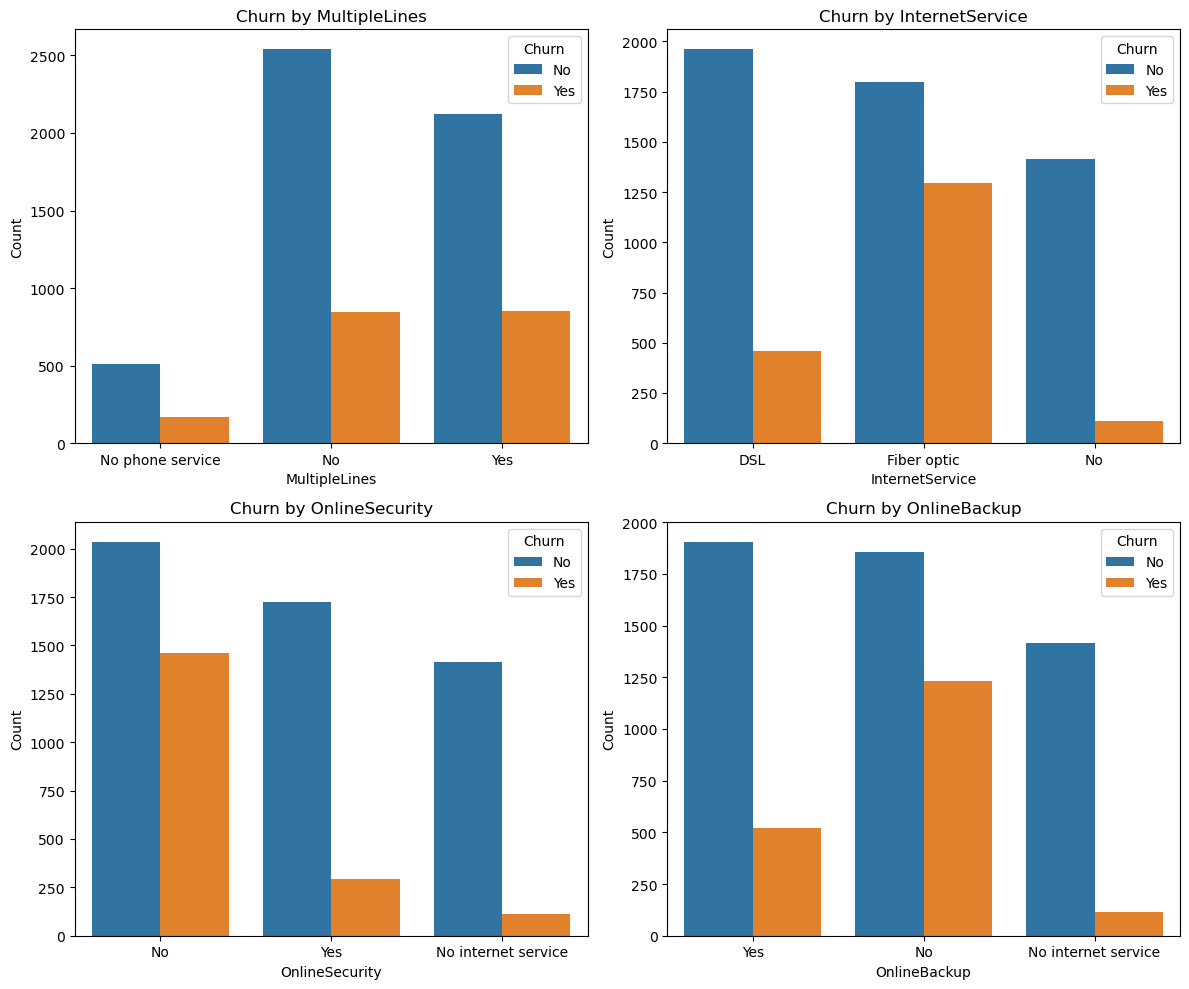

In [37]:
categorical_cols2= ['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup'] 
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_cols2, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'Churn by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

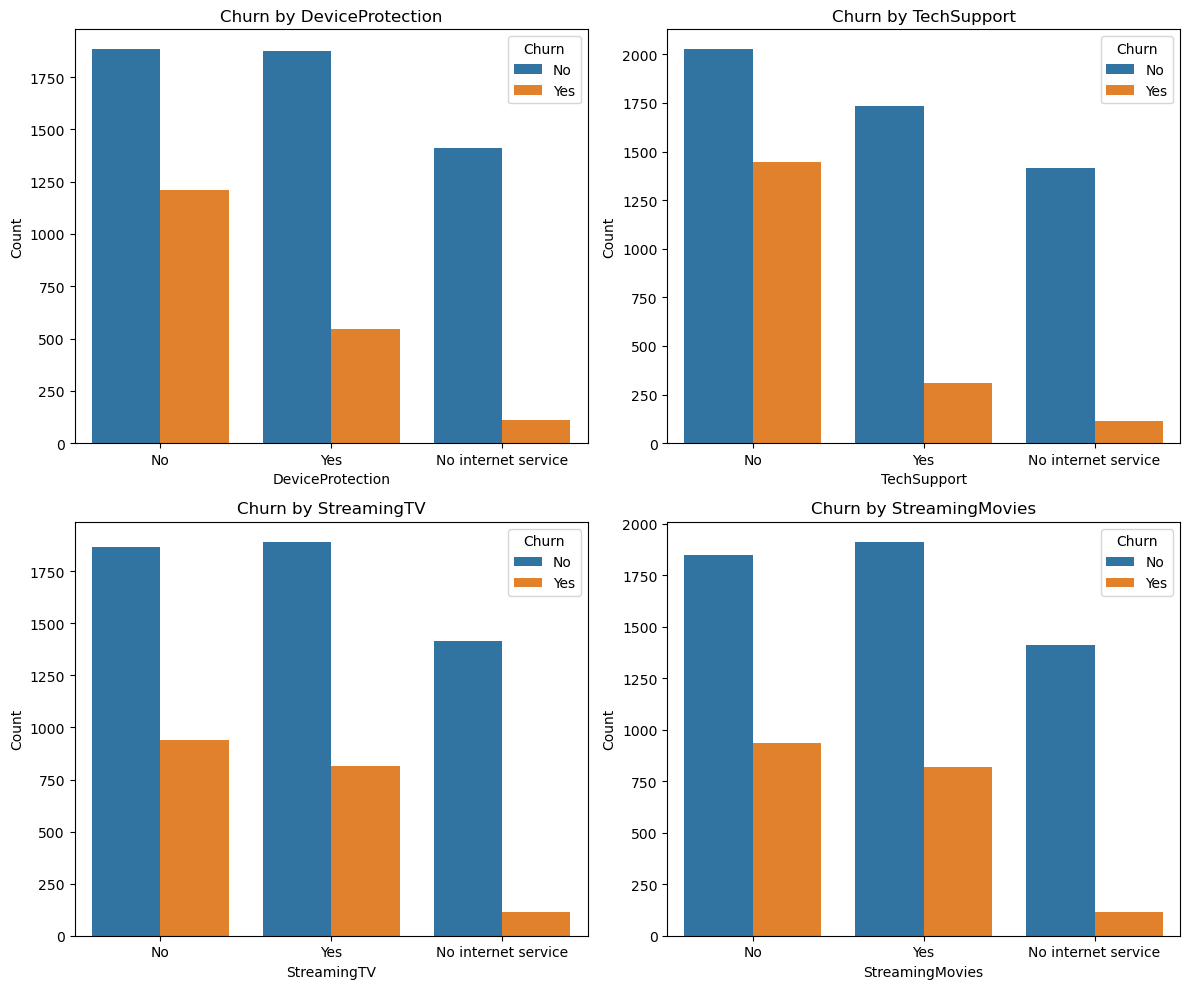

In [38]:
categorical_cols3= ['DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'] 
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_cols3, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'Churn by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

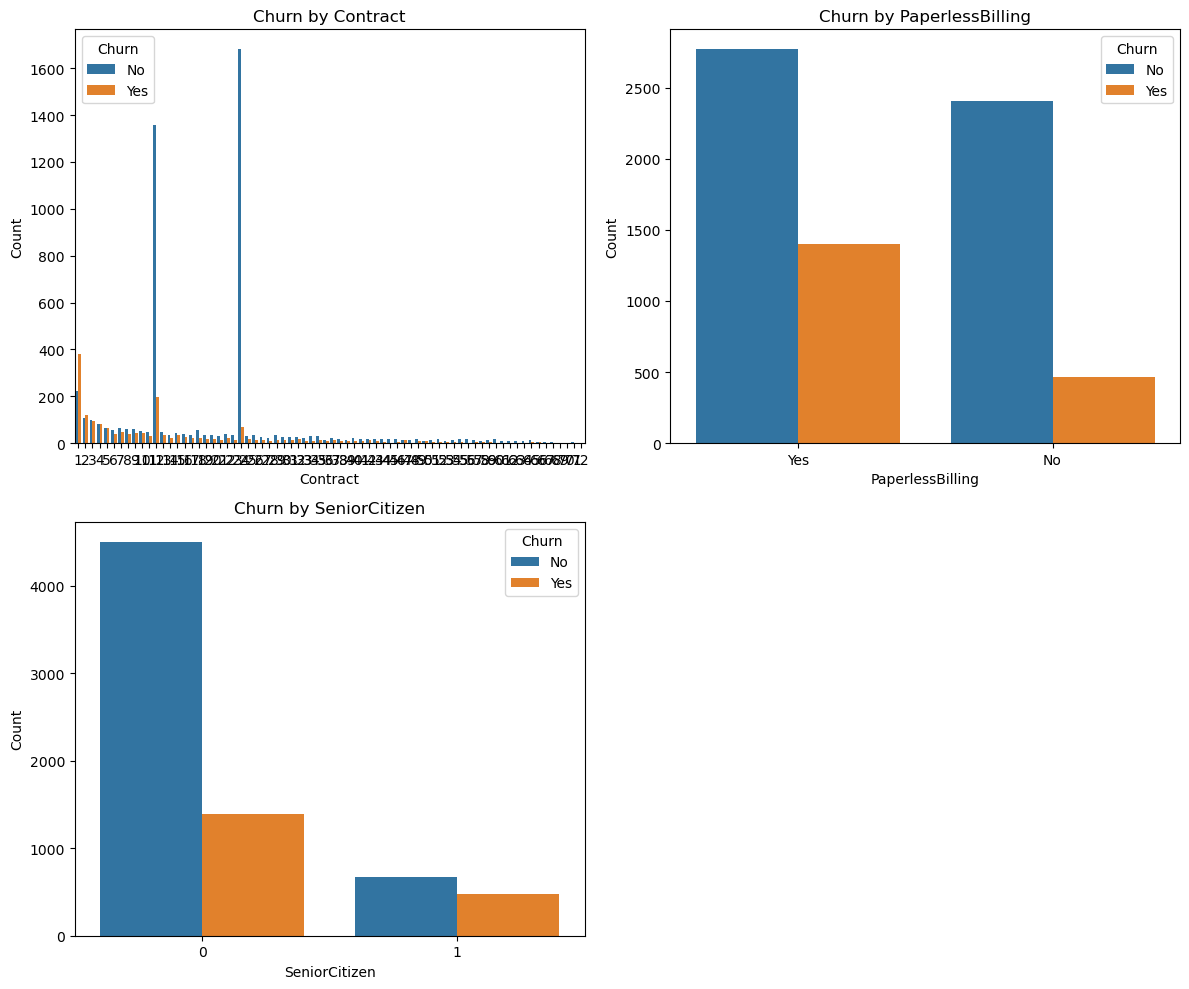

In [39]:
categorical_cols4= ['Contract','PaperlessBilling', 'SeniorCitizen'] 
plt.figure(figsize=(12, 10))
for i, var in enumerate(categorical_cols4, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=var, hue='Churn', data=df)
    plt.title(f'Churn by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bank transfer (automatic)'),
  Text(1, 0, 'Credit card (automatic)'),
  Text(2, 0, 'Electronic check'),
  Text(3, 0, 'Mailed check')])

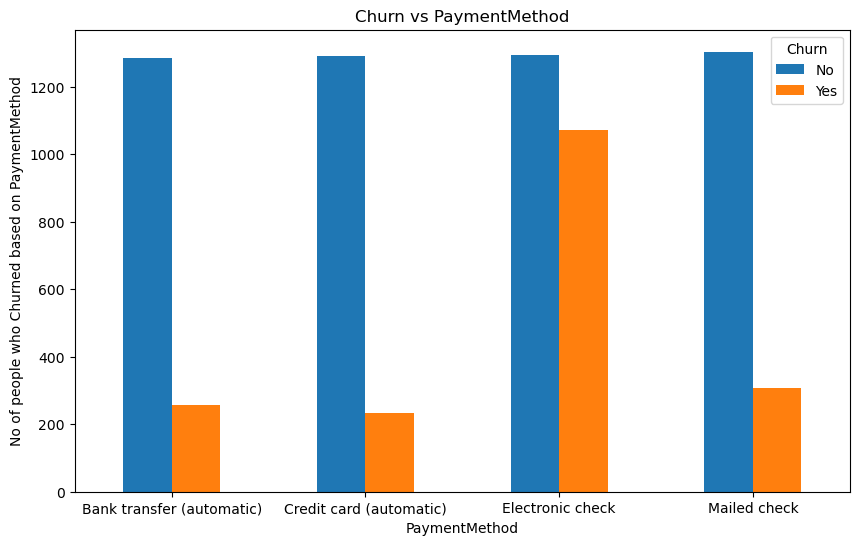

In [40]:
#Create a plot for crosstab

pd.crosstab(df['PaymentMethod'],df['Churn']).plot(kind="bar",figsize=(10,6))
plt.title("Churn vs PaymentMethod")
plt.xlabel("PaymentMethod")
plt.ylabel("No of people who Churned based on PaymentMethod")
#plt.legend(["Not Churned","Churned"])
plt.xticks(rotation=0)

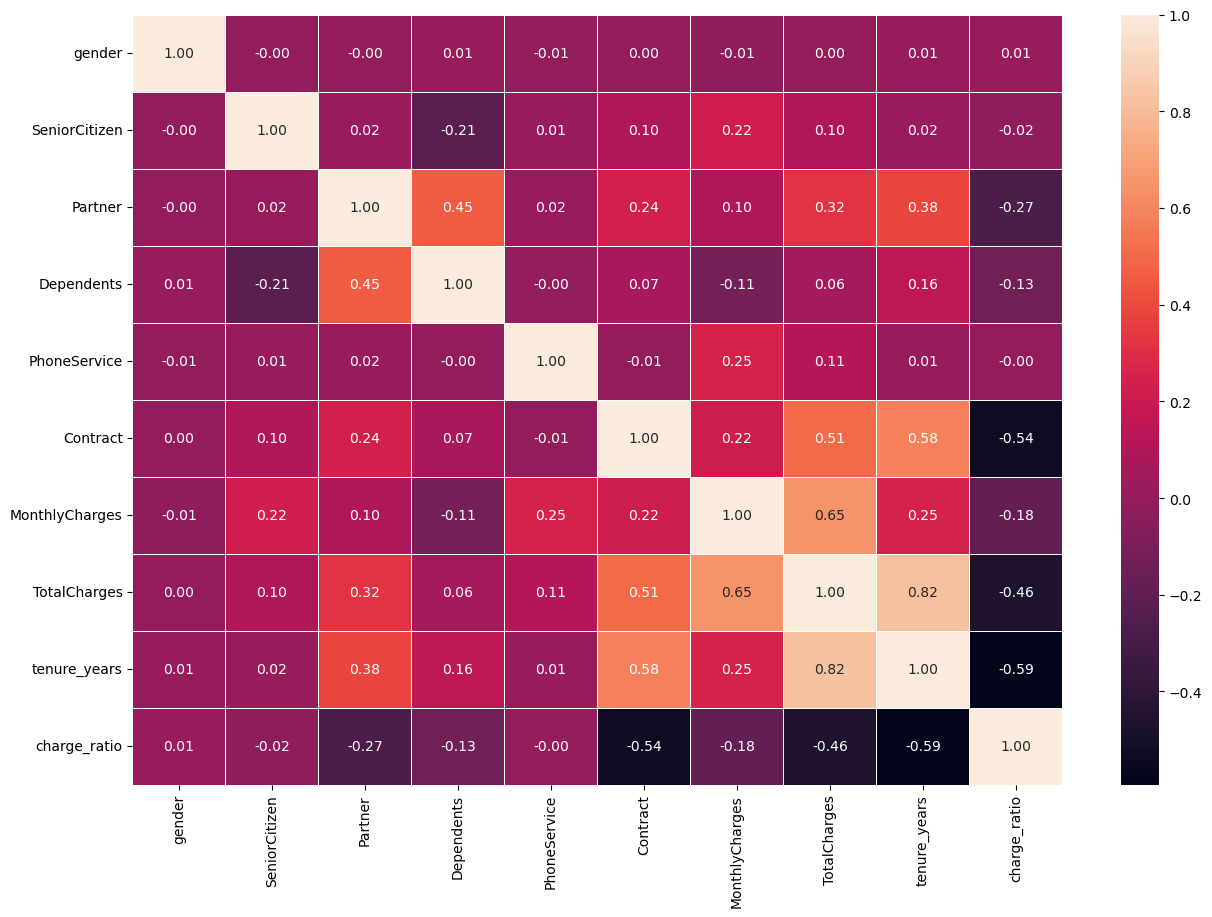

In [41]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [42]:
df_dummies = pd.get_dummies(df)

In [43]:
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,Contract,MonthlyCharges,TotalCharges,tenure_years,charge_ratio,...,StreamingMovies_No internet service,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,0,1,0,0,1,29.85,29.85,0.083333,1.000000,...,0,0,0,1,0,0,1,0,1,0
1,1,0,0,0,1,12,56.95,1889.50,2.833333,0.030140,...,0,0,1,0,0,0,0,1,1,0
2,1,0,0,0,1,2,53.85,108.15,0.166667,0.497920,...,0,0,0,1,0,0,0,1,0,1
3,1,0,0,0,0,12,42.30,1840.75,3.750000,0.022980,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,1,2,70.70,151.65,0.166667,0.466205,...,0,0,0,1,0,0,1,0,0,1


In [44]:
df_dummies.drop('Churn_No', axis=1, inplace=True)

In [45]:
df_dummies.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
Contract                                   0
MonthlyCharges                             0
TotalCharges                               0
tenure_years                               0
charge_ratio                               0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProt

In [46]:
df_dummies['Churn_Yes'].value_counts()

0    5174
1    1869
Name: Churn_Yes, dtype: int64

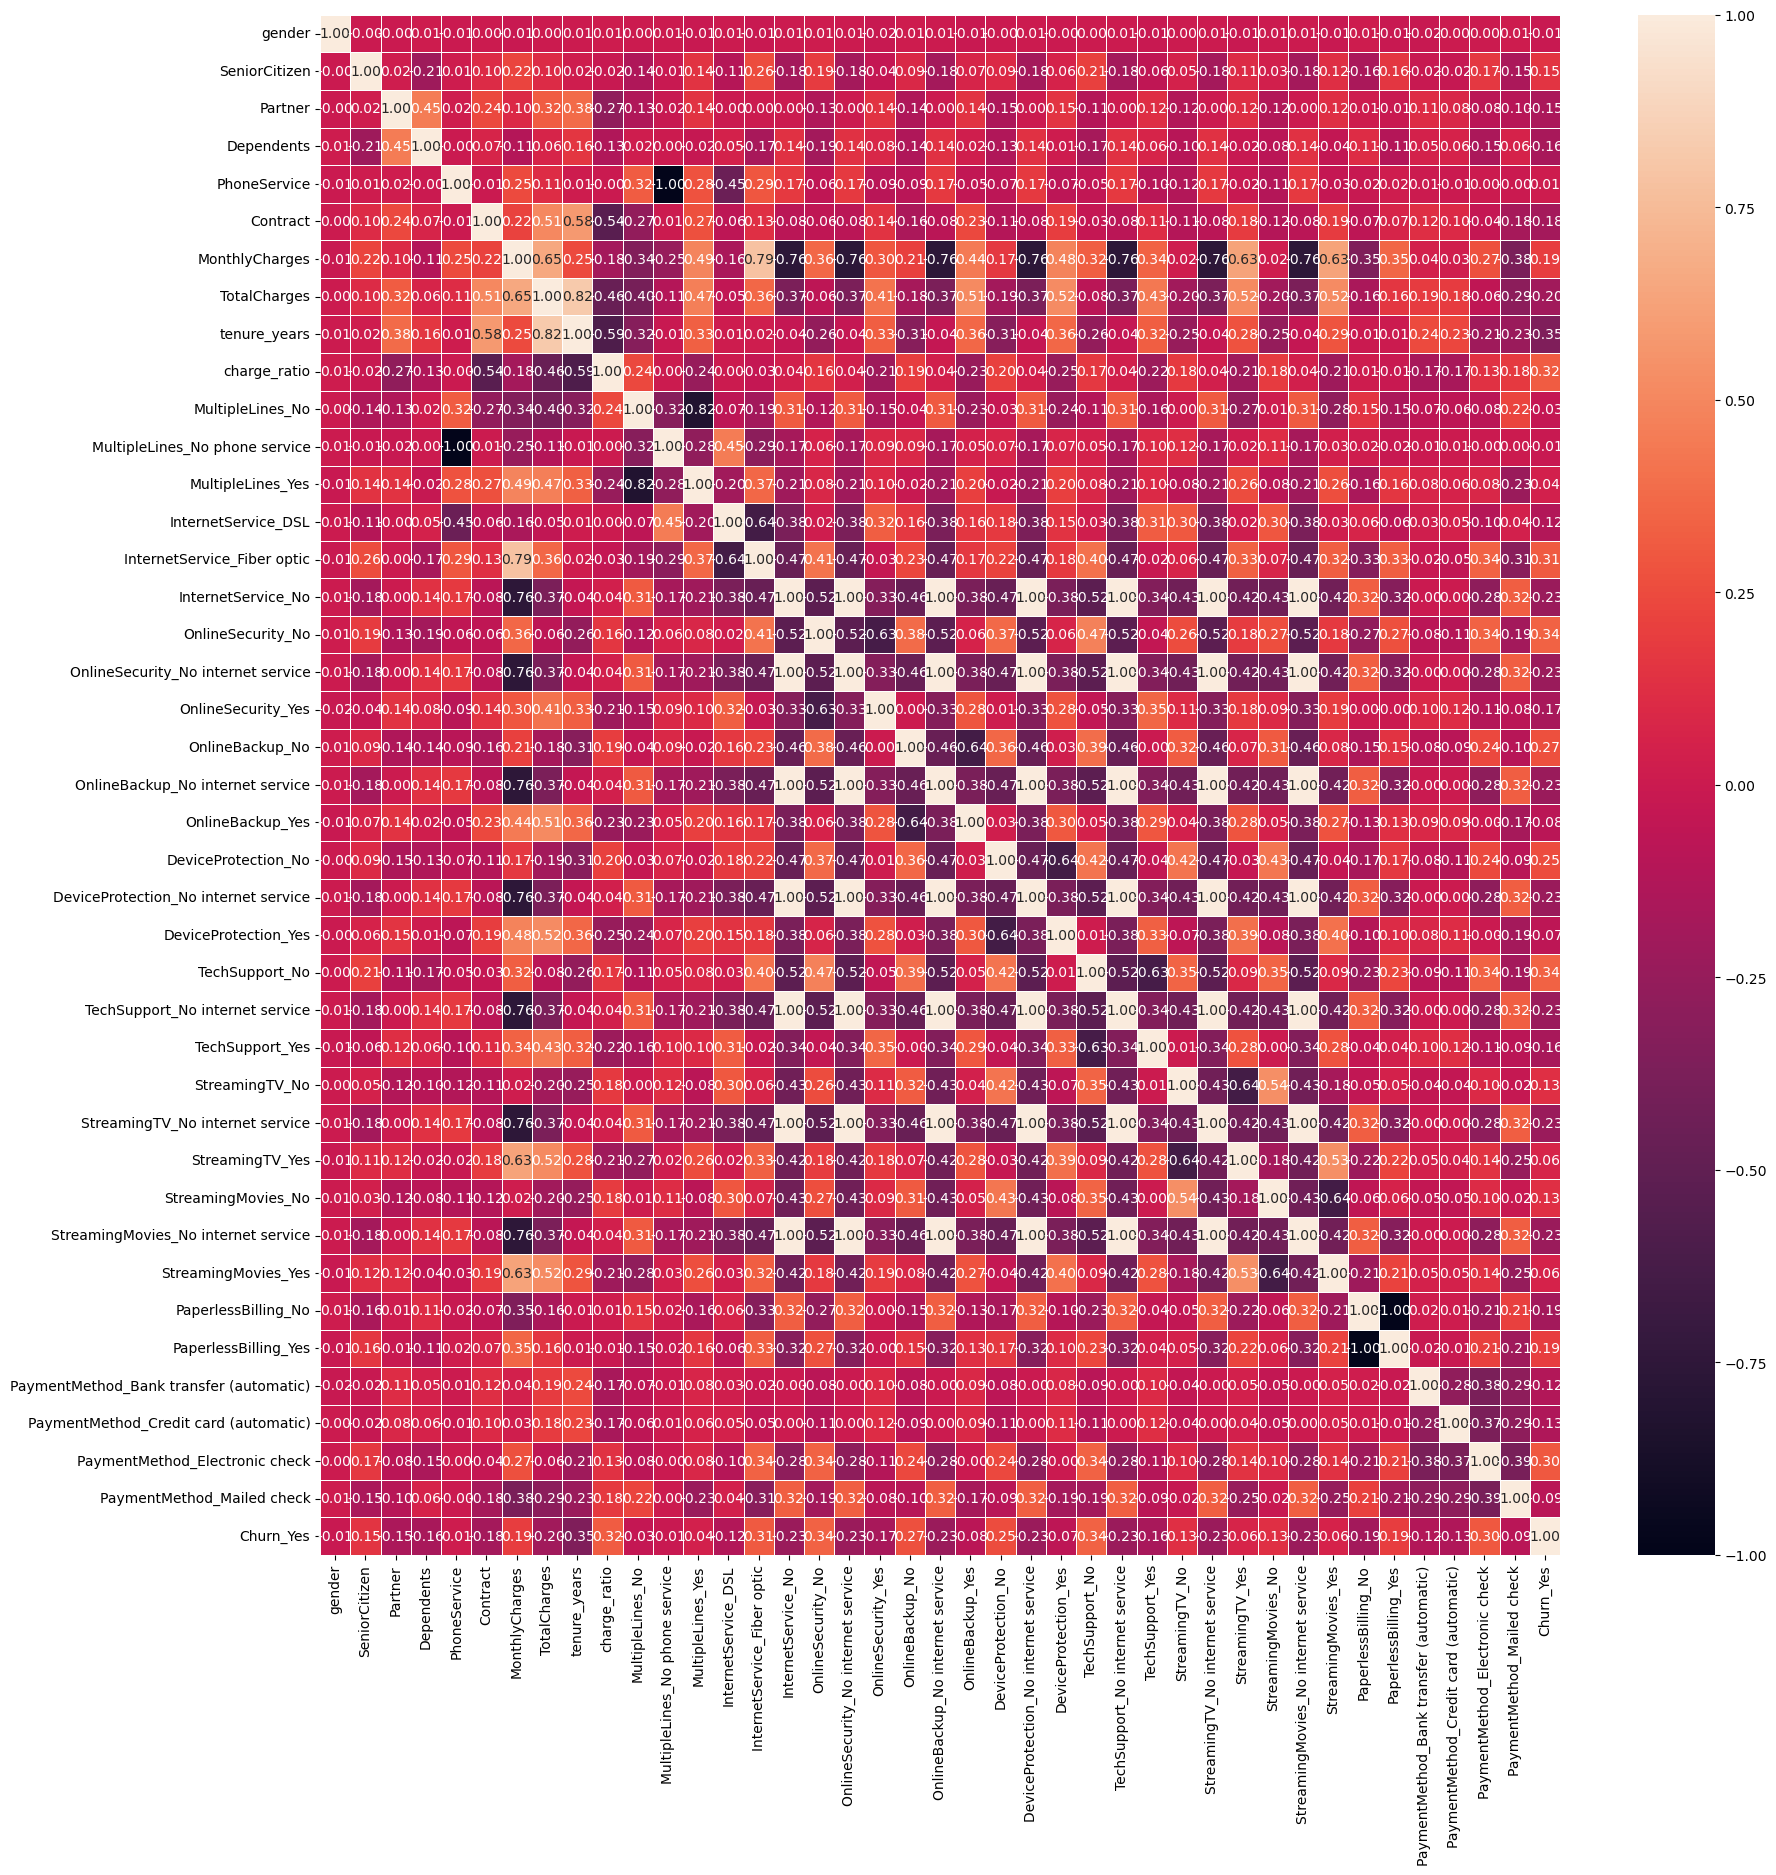

In [47]:
corr_matrix=df_dummies.corr()
fig,ax=plt.subplots(figsize=(20,20))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [48]:
correlation = df_dummies['InternetService_No'].corr(df_dummies['StreamingMovies_No internet service'])
print("Correlation between InternetService_No and StreamingMovies_No internet service:", correlation)

correlation = df_dummies['InternetService_No'].corr(df_dummies['OnlineSecurity_No internet service'])
print("\n Correlation between InternetService_No and OnlineSecurity_No internet service:", correlation)

correlation = df_dummies['InternetService_No'].corr(df_dummies['OnlineBackup_No internet service'])
print("\n Correlation between InternetService_No and OnlineBackup_No internet service:", correlation)

correlation = df_dummies['InternetService_No'].corr(df_dummies['DeviceProtection_No internet service'])
print("\n Correlation between InternetService_No and DeviceProtection_No internet service:", correlation)

correlation = df_dummies['InternetService_No'].corr(df_dummies['TechSupport_No internet service'])
print("\n Correlation between InternetService_No and TechSupport_No internet service:", correlation)

correlation = df_dummies['InternetService_No'].corr(df_dummies['StreamingTV_No internet service'])
print("\n Correlation between InternetService_No and StreamingTV_No internet service:", correlation)


df_dummies.drop('StreamingMovies_No internet service', axis=1, inplace=True)
df_dummies.drop('OnlineSecurity_No internet service', axis=1, inplace=True)
df_dummies.drop('OnlineBackup_No internet service', axis=1, inplace=True)
df_dummies.drop('DeviceProtection_No internet service', axis=1, inplace=True)
df_dummies.drop('TechSupport_No internet service', axis=1, inplace=True)
df_dummies.drop('StreamingTV_No internet service', axis=1, inplace=True)


Correlation between InternetService_No and StreamingMovies_No internet service: 0.9999999999999999

 Correlation between InternetService_No and OnlineSecurity_No internet service: 0.9999999999999999

 Correlation between InternetService_No and OnlineBackup_No internet service: 0.9999999999999999

 Correlation between InternetService_No and DeviceProtection_No internet service: 0.9999999999999999

 Correlation between InternetService_No and TechSupport_No internet service: 0.9999999999999999

 Correlation between InternetService_No and StreamingTV_No internet service: 0.9999999999999999


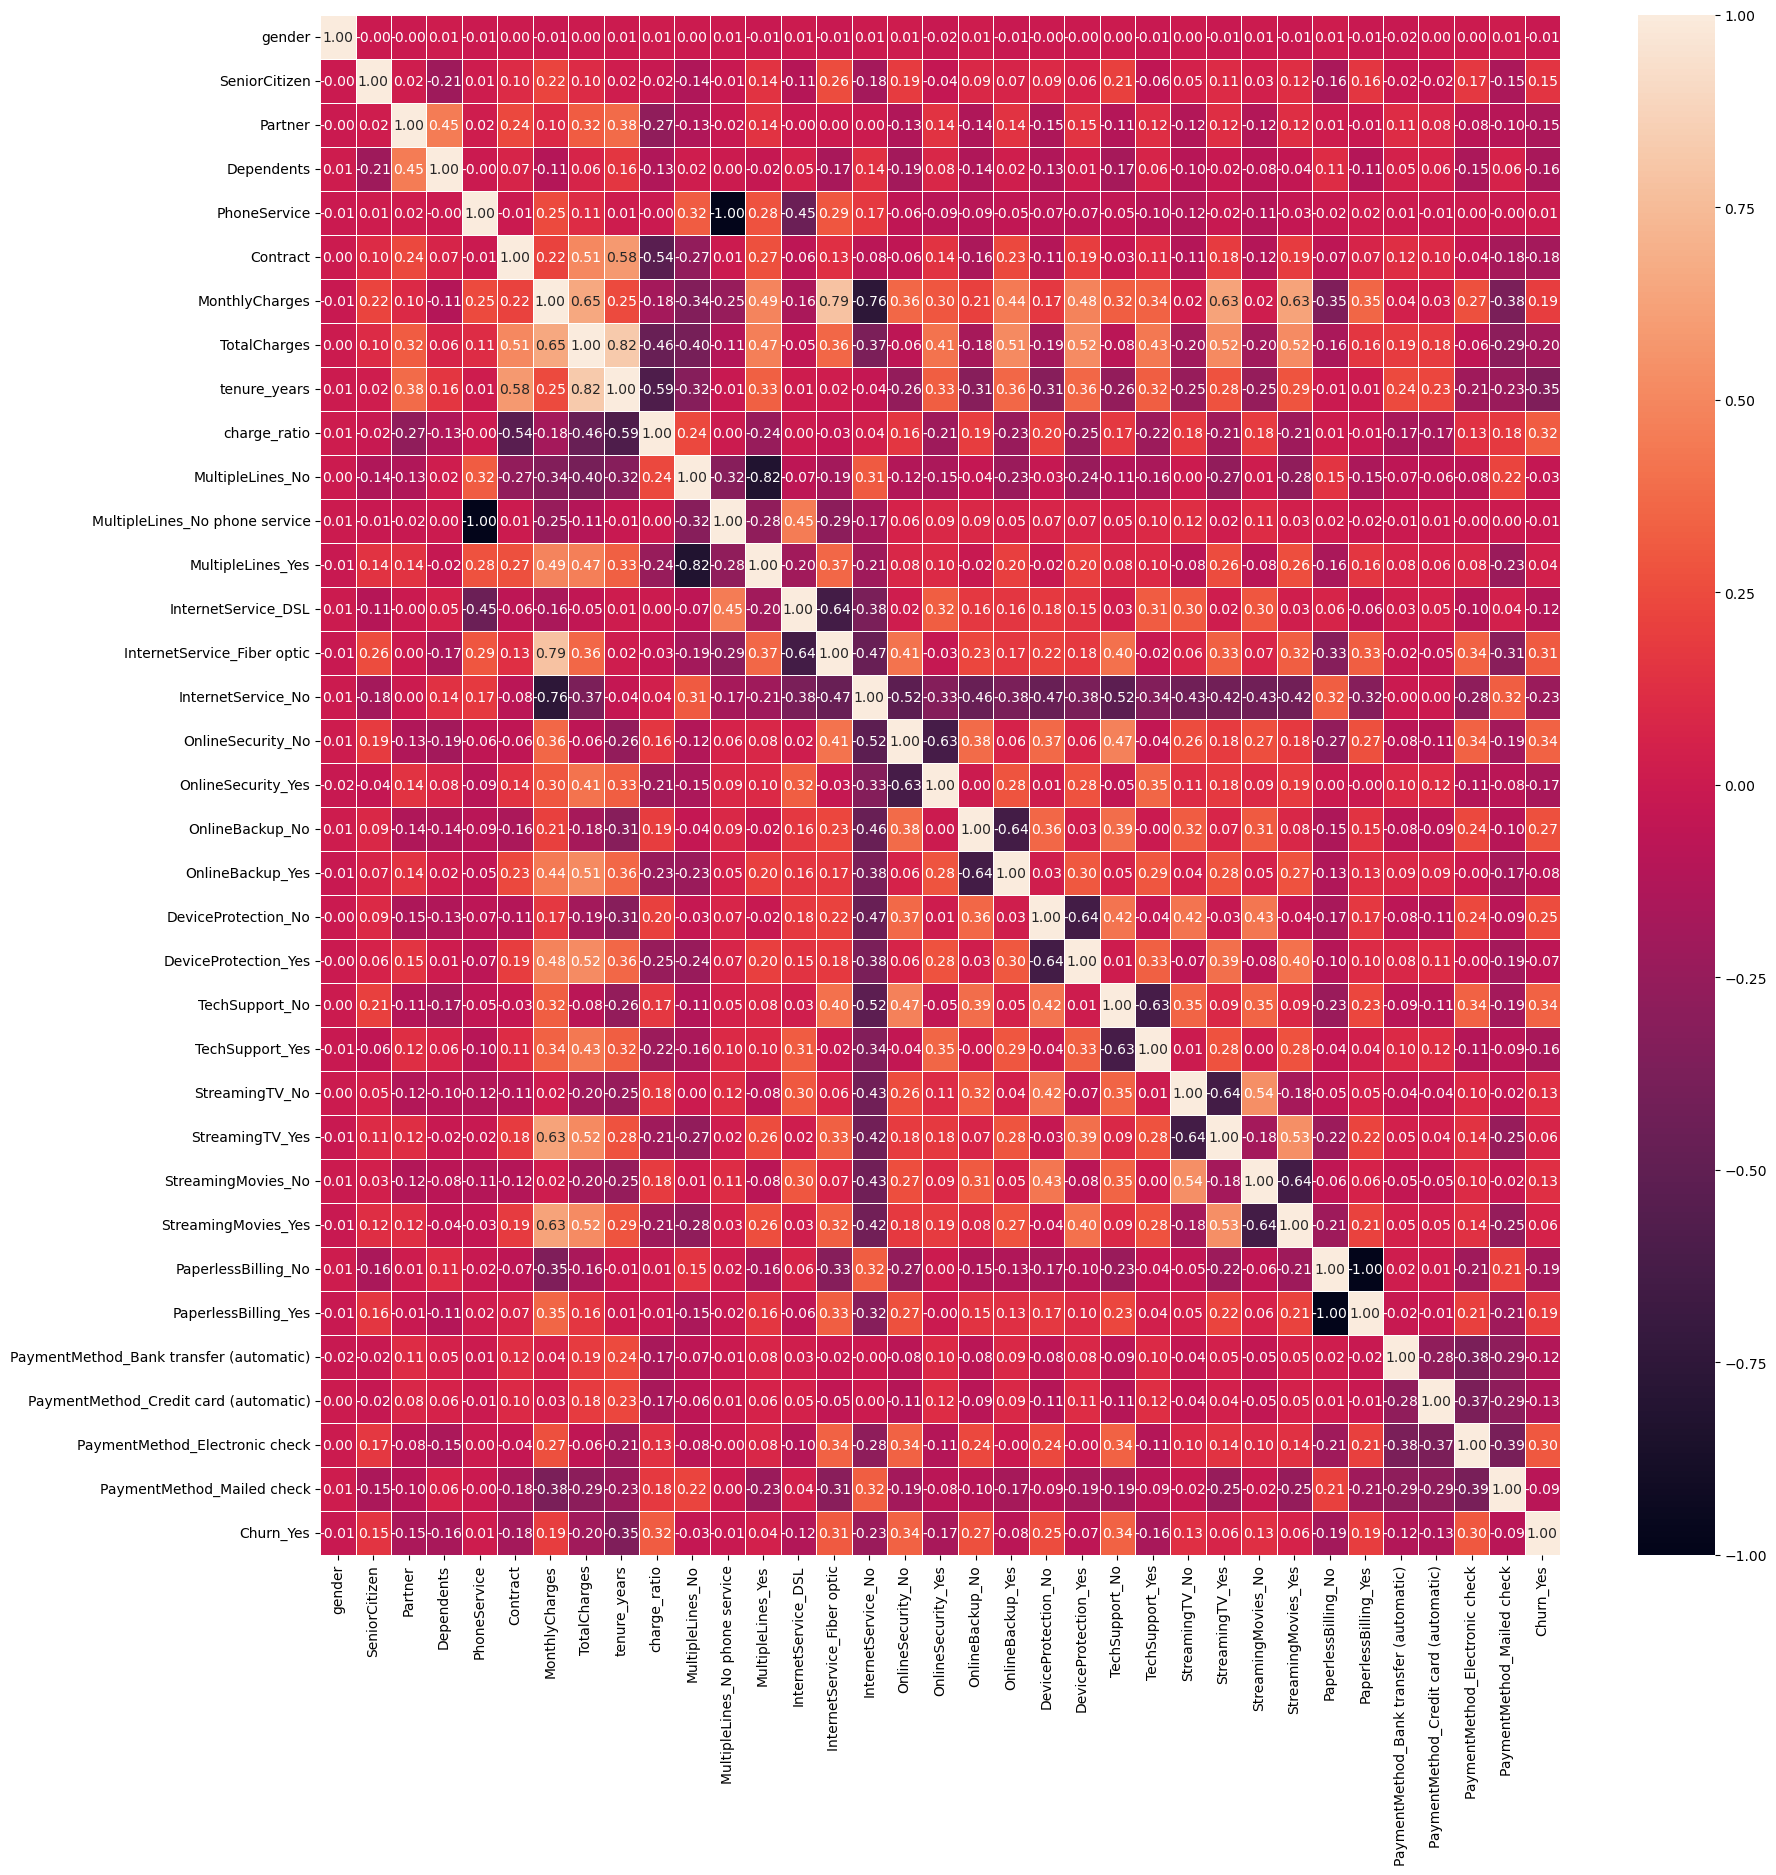

In [49]:
corr_matrix=df_dummies.corr()
fig,ax=plt.subplots(figsize=(20,20))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

In [50]:
df_dummies.shape

(7043, 35)

In [51]:
df_dummies.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,Contract,MonthlyCharges,TotalCharges,tenure_years,charge_ratio,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,0,0,1,29.85,29.85,0.083333,1.000000,...,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,1,12,56.95,1889.50,2.833333,0.030140,...,0,1,0,1,0,0,0,0,1,0
2,1,0,0,0,1,2,53.85,108.15,0.166667,0.497920,...,0,1,0,0,1,0,0,0,1,1
3,1,0,0,0,0,12,42.30,1840.75,3.750000,0.022980,...,0,1,0,1,0,1,0,0,0,0
4,0,0,0,0,1,2,70.70,151.65,0.166667,0.466205,...,0,1,0,0,1,0,0,1,0,1


In [52]:
df_dummies.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
Contract                                   0
MonthlyCharges                             0
TotalCharges                               0
tenure_years                               0
charge_ratio                               0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
TechSuppor

Total Services Used: Created a new column named "Total_services" that sums up the number of services ( phone, internet, streaming TV, etc.) each customer has signed up for. This can give an indication of the level of engagement or dependency a customer has on those services

In [53]:
service_columns = ['PhoneService', 'MultipleLines_Yes', 'InternetService_DSL', 
                   'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 
                   'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes','StreamingMovies_Yes']

df_dummies['Total_services'] = df_dummies[service_columns].sum(axis=1)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

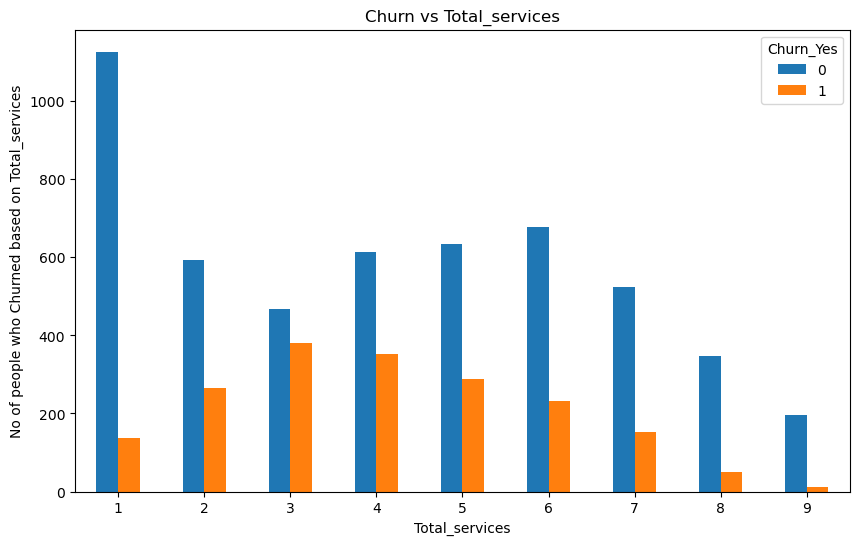

In [54]:
pd.crosstab(df_dummies['Total_services'],df_dummies['Churn_Yes']).plot(kind="bar",figsize=(10,6))
plt.title("Churn vs Total_services")
plt.xlabel("Total_services")
plt.ylabel("No of people who Churned based on Total_services")
#plt.legend(["Not Churned","Churned"])
plt.xticks(rotation=0)

Family Size: To make it simpler , combined information from 'partner' and 'dependents' columns to create a new column representing the total family size for each customer.

In [55]:
df_dummies['Family_size'] = df_dummies['Partner'] + df_dummies['Dependents']
df_dummies.drop('Partner', axis=1, inplace=True)
df_dummies.drop('Dependents', axis=1, inplace=True)

In [56]:
df_dummies.head()

,gender,SeniorCitizen,PhoneService,Contract,MonthlyCharges,TotalCharges,tenure_years,charge_ratio,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,Total_services,Family_size
0,0,0,0,1,29.85,29.85,0.083333,1.000000,0,1,...,0,0,1,0,0,1,0,0,2,1
1,1,0,1,12,56.95,1889.50,2.833333,0.030140,1,0,...,0,1,0,0,0,0,1,0,4,0
2,1,0,1,2,53.85,108.15,0.166667,0.497920,1,0,...,0,0,1,0,0,0,1,1,4,0
3,1,0,0,12,42.30,1840.75,3.750000,0.022980,0,1,...,0,1,0,1,0,0,0,0,4,0
4,0,0,1,2,70.70,151.65,0.166667,0.466205,1,0,...,0,0,1,0,0,1,0,1,2,0


(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

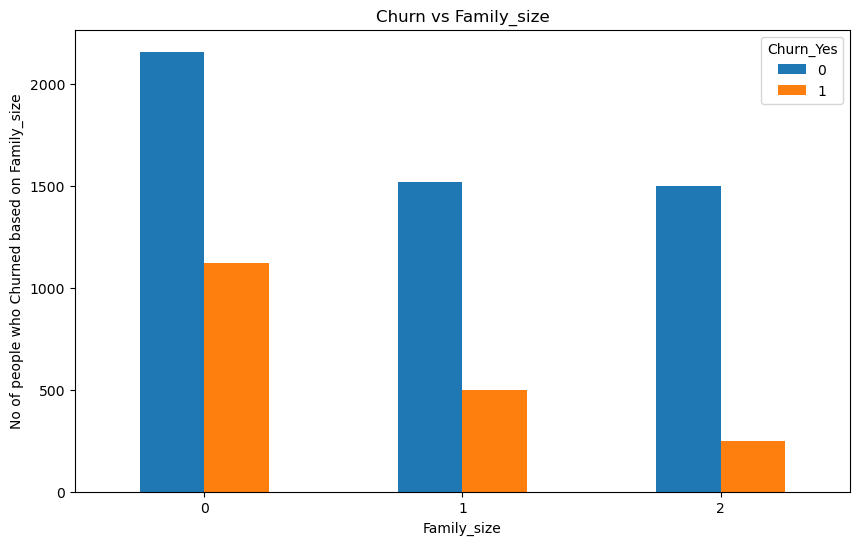

In [57]:
pd.crosstab(df_dummies['Family_size'],df_dummies['Churn_Yes']).plot(kind="bar",figsize=(10,6))
plt.title("Churn vs Family_size")
plt.xlabel("Family_size")
plt.ylabel("No of people who Churned based on Family_size")
#plt.legend(["Not Churned","Churned"])
plt.xticks(rotation=0)

In [58]:
df_dummies.shape

(7043, 35)

In [57]:
y = df_dummies["Churn_Yes"]
X = df_dummies.drop("Churn_Yes",axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)

(5634, 34)
(1409, 34)


In [58]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0


In [59]:
lr=LogisticRegression(C = 0.1, random_state = 42, solver = 'liblinear')
dt=DecisionTreeClassifier()
rm=RandomForestClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
svc = SVC(kernel='linear')

In [60]:
for a,b in zip([lr,dt,knn,svc,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVC","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.811502
[Logistic Regression] test data accuracy is : 0.790632
[Decision Tree] training data accuracy is : 0.997693
[Decision Tree] test data accuracy is : 0.717530


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[KNN] training data accuracy is : 0.861200
[KNN] test data accuracy is : 0.748048
[SVC] training data accuracy is : 0.810614
[SVC] test data accuracy is : 0.789212
[Random Forest] training data accuracy is : 0.997693
[Random Forest] test data accuracy is : 0.783534
[Naive Bayes] training data accuracy is : 0.760561
[Naive Bayes] test data accuracy is : 0.743790


 I picked up top 3 algorithms with top 3 highest accuracy: Logistic Regression, Random Forest and Support Vector Classifier

In [61]:
def report_heatmap(y_pred,y_test):
    
    # overall accuracy 
    acc = accuracy_score(y_test, y_pred)
    print( f'Overall Accuracy: {acc*100:.2f}%' )
    print("--------------------------")    
    
    # report
    print(classification_report(y_test, y_pred))
    figsize=(8,5)
    #y_pred = y_pred.astype(int)
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.2f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.2f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

Overall Accuracy: 79.06%
--------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1112
           1       0.50      0.63      0.56       297

    accuracy                           0.79      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.81      0.79      0.80      1409



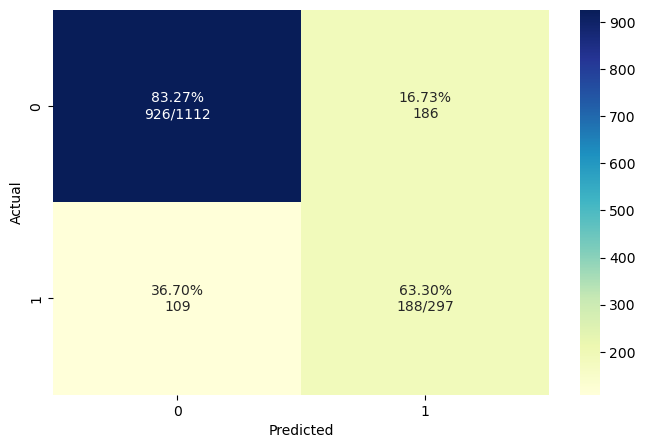

In [62]:
lr_y_preds = lr.predict(X_test)


report_heatmap(y_test,lr_y_preds)

Overall Accuracy: 78.35%
--------------------------
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1110
           1       0.49      0.62      0.55       299

    accuracy                           0.78      1409
   macro avg       0.69      0.72      0.70      1409
weighted avg       0.80      0.78      0.79      1409



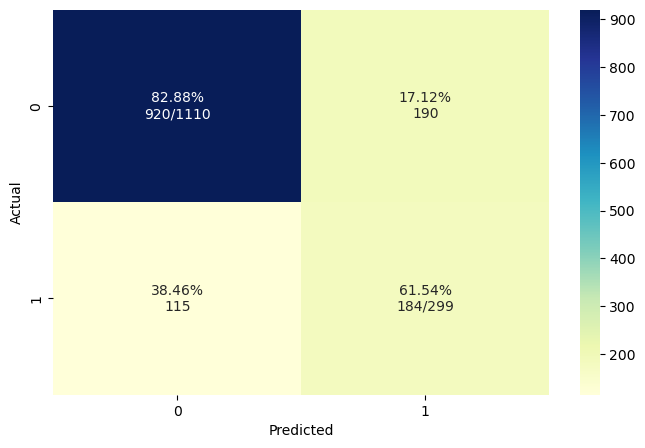

In [63]:
rm_y_preds = rm.predict(X_test)


report_heatmap(y_test,rm_y_preds)

Overall Accuracy: 78.92%
--------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1118
           1       0.49      0.63      0.55       291

    accuracy                           0.79      1409
   macro avg       0.69      0.73      0.71      1409
weighted avg       0.81      0.79      0.80      1409



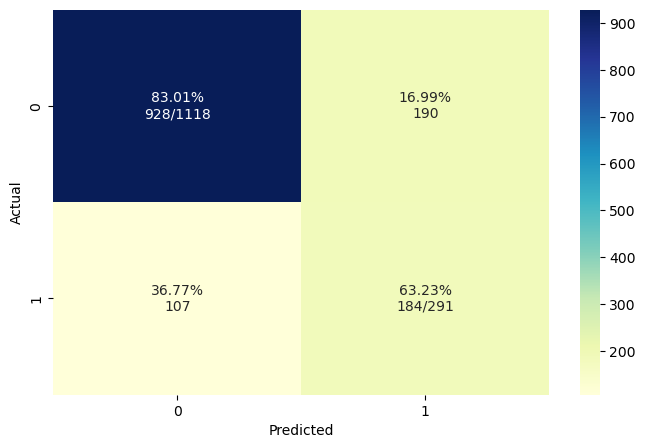

In [64]:

svc_y_preds = svc.predict(X_test)


report_heatmap(y_test,svc_y_preds)

Overall Accuracy: 79.21%
--------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1120
           1       0.49      0.64      0.56       289

    accuracy                           0.79      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.82      0.79      0.80      1409



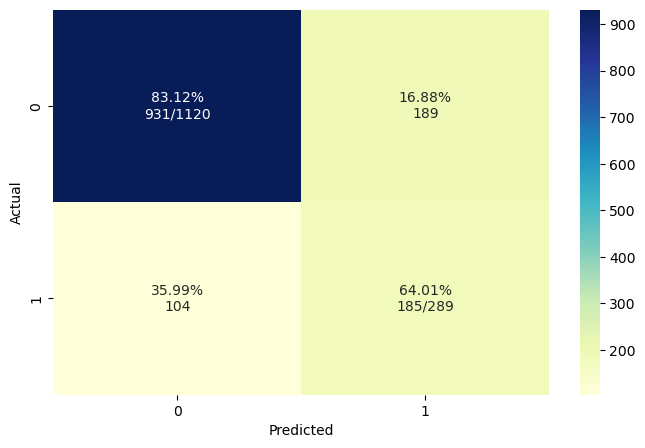

In [65]:
estimator=[
    ('LR',lr),
    ('RFC',rm),
    ('SVC',svc)]
ensm=StackingClassifier(estimators=estimator, final_estimator=LogisticRegression())

ensm.fit(X_train,y_train)

ensm_y_preds = ensm.predict(X_test)


report_heatmap(y_test,ensm_y_preds)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Logistic Regression,KNN classifier,Support Vector Machine,Random forest,Decision tree,Naive Bayes,Ensemble
accuracy,0.790632,0.748048,0.789212,0.783534,0.71753,0.74379,0.792051


<AxesSubplot:>

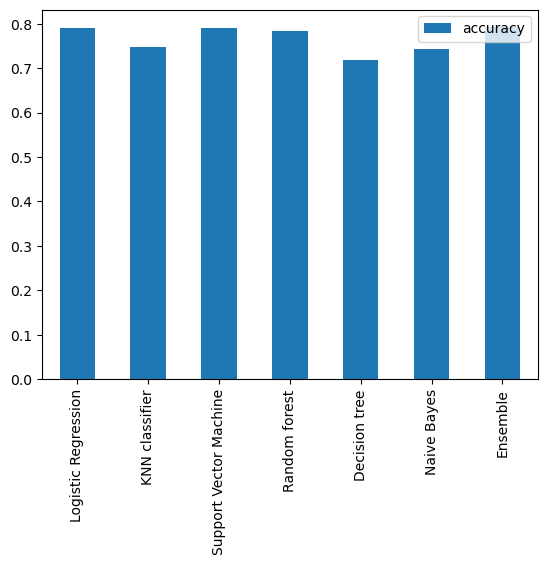

In [66]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN classifier':knn.score(X_test,y_test),
             'Support Vector Machine':svc.score(X_test,y_test),
             'Random forest':rm.score(X_test,y_test),
              'Decision tree':dt.score(X_test,y_test),
              'Naive Bayes':gnb.score(X_test,y_test),
              'Ensemble':ensm.score(X_test,y_test),
             }


model_compare=pd.DataFrame(model_scores,index=['accuracy'])

display(model_compare)

model_compare.T.plot(kind='bar')

In [78]:
df_dummies.columns

Index(['gender', 'SeniorCitizen', 'PhoneService', 'Contract', 'MonthlyCharges',
       'TotalCharges', 'tenure_years', 'charge_ratio', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes', 'Total_services', 'Family_size'],
      dtype='object')

In [67]:
feature_dict=dict(zip(df_dummies.columns,list(lr.coef_[0])))
feature_dict

{'gender': -0.06525844547942225,
 'SeniorCitizen': 0.21818570517988856,
 'PhoneService': -0.3101675378955682,
 'Contract': 0.14596252791507913,
 'MonthlyCharges': 0.2243745015213769,
 'TotalCharges': -0.6123587759753337,
 'tenure_years': -1.7540263490880714,
 'charge_ratio': 1.309619359910505,
 'MultipleLines_No': -0.3301697013805607,
 'MultipleLines_No phone service': -0.18791222516197717,
 'MultipleLines_Yes': 0.02000216348481022,
 'InternetService_DSL': -0.4193022336798856,
 'InternetService_Fiber optic': 0.5772135446098707,
 'InternetService_No': -0.6559910739876547,
 'OnlineSecurity_No': 0.3292870276094955,
 'OnlineSecurity_Yes': -0.17137571667948395,
 'OnlineBackup_No': 0.1835262859671029,
 'OnlineBackup_Yes': -0.02561497503711253,
 'DeviceProtection_No': 0.11394112510894554,
 'DeviceProtection_Yes': 0.04397018582098645,
 'TechSupport_No': 0.3169449306472652,
 'TechSupport_Yes': -0.15903361971726676,
 'StreamingTV_No': -0.049490853014287135,
 'StreamingTV_Yes': 0.2074021639442347

<AxesSubplot:title={'center':'Feature Importance'}>

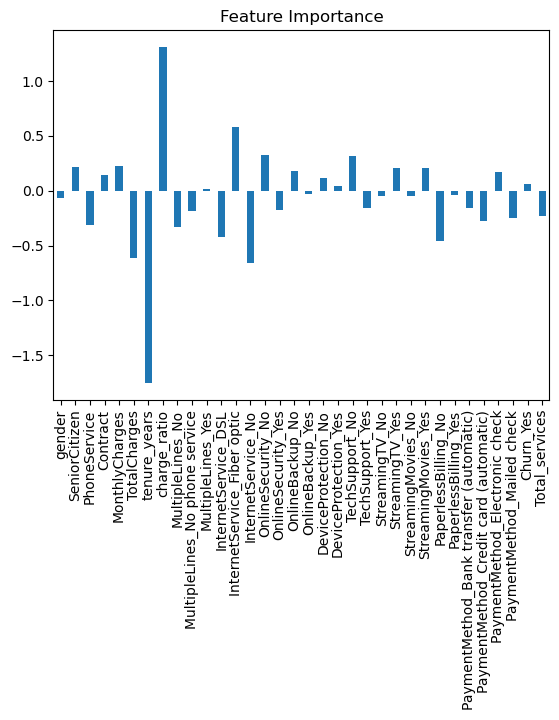

In [68]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [69]:
from sklearn.decomposition import PCA


pca = PCA(n_components=7) 


pca.fit(X_scaled)


X_pca = pca.transform(X_scaled)

X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=4)
print(X_train.shape)
print(X_test.shape)


(5634, 7)
(1409, 7)


In [70]:
for a,b in zip([lr,dt,knn,svc,rm,gnb],["Logistic Regression","Decision Tree","KNN","SVC","Random Forest","Naive Bayes"]):
    a.fit(X_train,y_train)
    prediction=a.predict(X_train)
    y_pred=a.predict(X_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.792687
[Logistic Regression] test data accuracy is : 0.774308
[Decision Tree] training data accuracy is : 0.997693
[Decision Tree] test data accuracy is : 0.717530


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[KNN] training data accuracy is : 0.855343
[KNN] test data accuracy is : 0.745209
[SVC] training data accuracy is : 0.787717
[SVC] test data accuracy is : 0.773598
[Random Forest] training data accuracy is : 0.997515
[Random Forest] test data accuracy is : 0.753726
[Naive Bayes] training data accuracy is : 0.783990
[Naive Bayes] test data accuracy is : 0.773598


In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print(best_model)

LogisticRegression(C=10)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

Overall Accuracy: 79.21%
--------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1120
           1       0.49      0.64      0.56       289

    accuracy                           0.79      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.82      0.79      0.80      1409



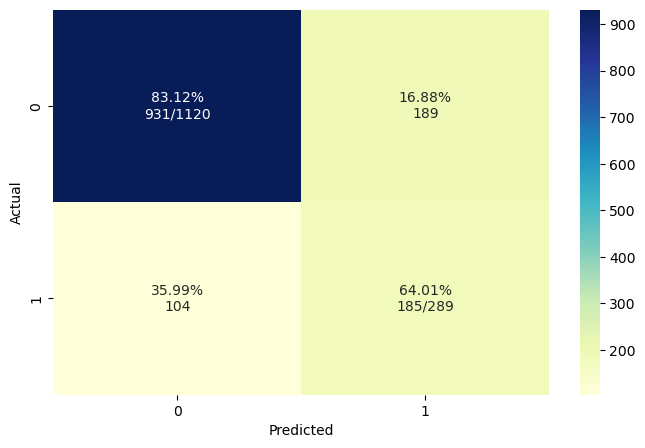

In [72]:
y_pred = best_model.predict(X_test)
report_heatmap(y_test,ensm_y_preds)

In [73]:
param_grid = {
    'C': [0.1, 1, 10, 100],    
    'gamma': [1, 0.1, 0.01, 0.001],  
    'kernel': ['rbf']  
}

svc = SVC()


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')


grid_search.fit(X_train, y_train)


best_svc = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Overall Accuracy: 79.21%
--------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1120
           1       0.49      0.64      0.56       289

    accuracy                           0.79      1409
   macro avg       0.70      0.74      0.71      1409
weighted avg       0.82      0.79      0.80      1409



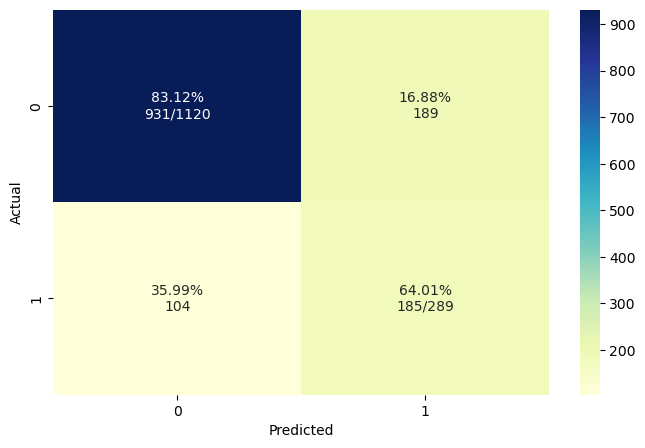

In [74]:
y_pred = best_svc.predict(X_test)
report_heatmap(y_test,ensm_y_preds)

In [75]:
# End